#1. PERKENALAN

In [ ]:
'''
Nama  : Rugaya Muksin BSA
Batch : 006
Phase : 2
ML    : 1
'''

'\nNama  : Rugaya Muksin BSA\nBatch : 006\nPhase : 2\nML    : 1\n'

**INTRODUCTION**

---
Prediksi Churn Pelanggan adalah prediksi perilaku pelanggan/klien untuk mengetahui kapan kemungkinan mereka akan membatalkan langganan.


**PROBLEM STATEMENT**

---
Memprediksi perilaku untuk mempertahankan pelanggan. Menganalisis semua data pelanggan yang relevan dan mengembangkan program retensi pelanggan.


**LANGKAH YANG SAYA LAKUKAN SEBAGAI SEORANG DATA SCIENCE UNTUK MENYELESAIKAN MASALAH YANG TERJADI**

---
1. Membersihkan dan mempersiapkan data. Mulai dari cleaning data (missing value, handling outlier, dll), encode fitur kategorik dan normalizing fitur numerik dengan tensor.
2. Mencari fitur yang memiliki hubungan yang erat dengan target. Disini saya akan melakukan 3 analisis yaitu yang pertama melalui hasil EDA, correlation score dan feature importance
3. Build model dengan neural network (ANN)
4. Melakukan predict dari model ANN yang sudah dibangun

**INFORMASI YANG ADA DALAM DATASET**

1. Pelanggan yang pergi dalam sebulan terakhir, status label pada kolom Churn adalah yes
2. Layanan yang telah didaftarkan oleh setiap pelanggan – telepon, banyak saluran, internet, keamanan online, pencadangan online, perlindungan perangkat, dukungan teknis, serta streaming TV dan film
3. Informasi akun pelanggan – sudah berapa lama mereka menjadi pelanggan, kontrak, metode pembayaran, tagihan tanpa kertas, tagihan bulanan, dan total tagihan
4. Info demografis tentang pelanggan – jenis kelamin, rentang usia, dan jika mereka memiliki pasangan dan tanggungan



#2. IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy import stats
import math
import scipy.stats as ss
%matplotlib inline
plt.style.use('fivethirtyeight')

# Split Dataset and Standarize the Datasets
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow import keras

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from collections import Counter

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#3. DATA LOADING

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rugayabsa/latihan-git/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#4. DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terdapat ketidaksesuaian tipe data pada fitur SeniorCitizen seharusnya type datanya adalah object, juga pada fitur TotalCharges seharusnya type datanya adalah float. 

###4.1 MENGUBAH TYPE DATA

Pengubahan type data sesuai dengan type data yang sebenarnya merupakan hal yang penting, karena sangat berpengaruh di tahapan EDA dan handling outlier.

###Mengubah type data fitur TotalCharges dari object ke float

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float64')

###Mengubah type data fitur SeniorCitizen dari integer ke object

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terlihat bahwa type data setiap fitur sudah sesuai dengan nilai/informasi yang dikandung didalamnya.

###4.2 DROP KOLOM YANG TIDAK PENTING

Saya memutuskan untuk drop fitur CustomerID karena informasi yang dimuat tidak merepresentasikan suatu data yang bersifat penting, dan hanya berisi informasi mengenai pemeringkatan.

In [ ]:
df.drop(columns=["customerID"],axis=1,inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


###4.3 CEK KEBERADAAN MISSING VALUE PADA DATASET

In [ ]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
dataset.

'''

mv = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(df)).round(2)*100
mv

,No. of missing values,% missing_values
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0
OnlineBackup,0,0.0


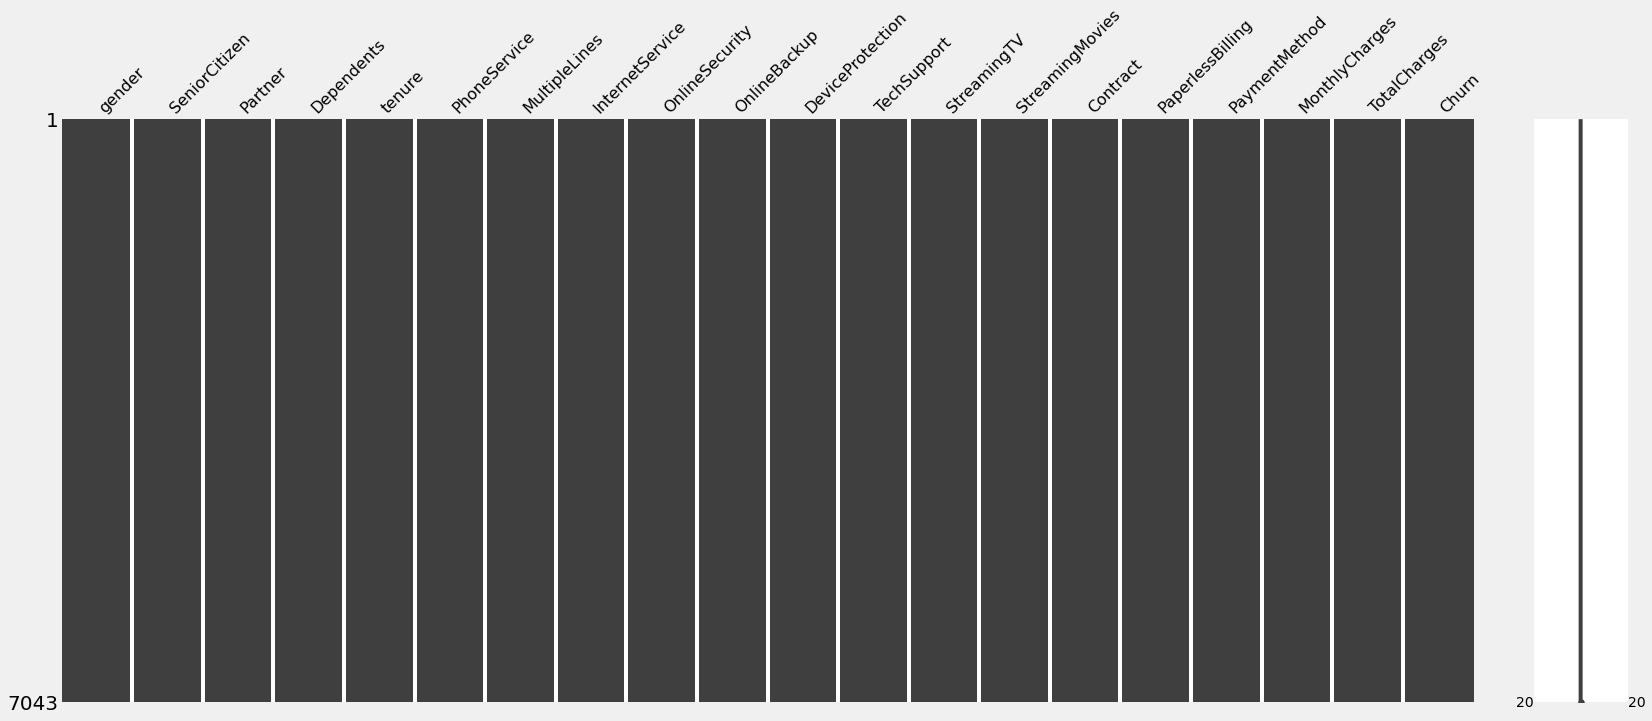

In [ ]:
import missingno as msno

msno.matrix(df)  # just to visualize. no missing value.

Dari visualisasi diatas terlihat bahwa dataset yang dimiliki bersih dari missing value.

#5. EDA

###5.1 CEK DAN ANALISIS PROPORSI LABEL PADA FITUR TARGET

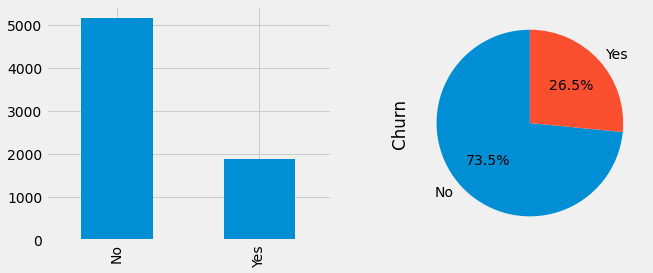

In [ ]:
'''
Visualisasi variabel target (Churn)

'''

fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['Churn'].value_counts().plot(kind='bar', ax=axs[0])
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

Sering kali, ketika layanannya bagus, terlihat bahwa tingkat churnnya agak kecil. Dengan demikian, dataset cenderung tidak seimbang. Dari hasil visualisasi diatas membuktikan asumsi tersebut.

Terlihat bahwa telah terjadi ketidakseimbangan label pada fitur target, presentasi churn lebih kecil proporsinya, sehingga dapat disimpulkan juga sejauh ini layanannya cukup bagus sehingga tingkat **churnnya** lebih kecil dibandingkan dengan label **no**.

Ketidakseimbangan yang terjadi pada label fitur target akan dihandle. Dari kelas minoritas ditingkatkan dengan cara - menduplikasi, atau membuat salinan sintetik menggunakan algoritma SMOTE dan akan dilakukan pada tahap preprocessing data.

###5.2 MELAKUKAN ANALISIS TERHADAP PERSEBARAN NILAI SETIAP FITUR TERHADAP FITUR TARGET

#####**GENDER VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, terlihat bahwa distribusi jenis kelamin pria dan wanita tampak tidak ada perbedaan (serupa), tidak menunjukkan perbedaan yang jelas antara churn dan pelanggan yang dipertahankan.

**Sehingga dapat disimpulkan bahwa fitur gender tidak memiliki pengaruh yang cukup kuat dalam terjadinya churn pelanggan.**

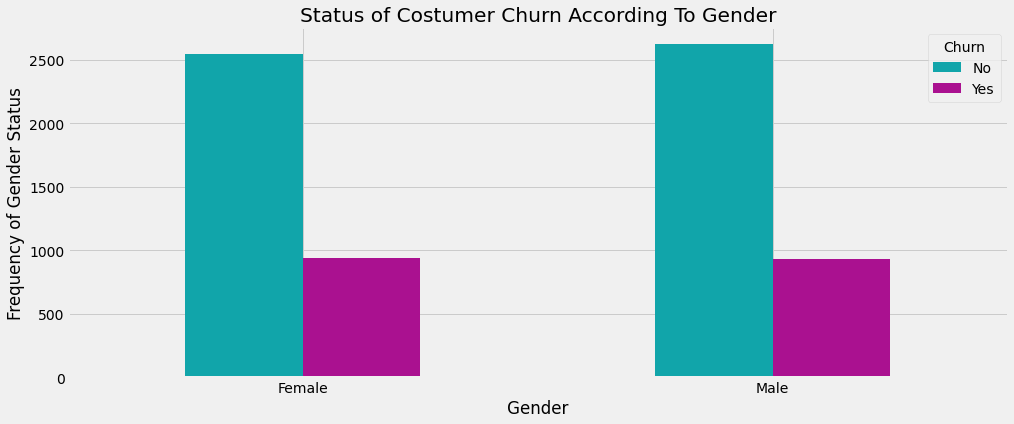

In [ ]:
pd.crosstab(df.gender, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Gender')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Gender Status')
plt.show()

#####**SENIOR CITIZEN VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, secara umum terlihat bahwa kebanyakan pelanggan bukan warga senior (usianya dibawah 65 tahun).

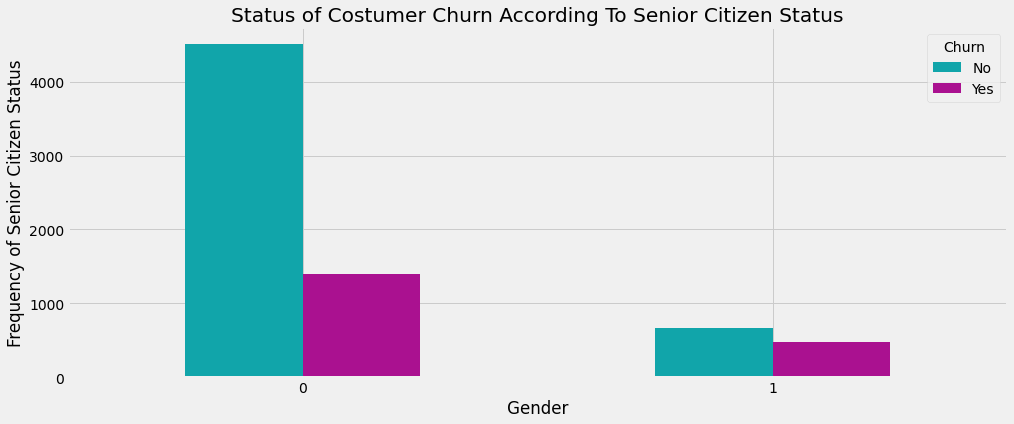

In [ ]:
pd.crosstab(df.SeniorCitizen, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Senior Citizen Status')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Senior Citizen Status')
plt.show()

#####**PARTNER VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, Secara umum terlihat bahwa jumlah pelanggan dengan atau tanpa mitra (partner) mirip.

**Sehingga dapat disimpulkan bahwa fitur Partner tidak memiliki pengaruh yang cukup kuat dalam terjadinya churn pelanggan.**

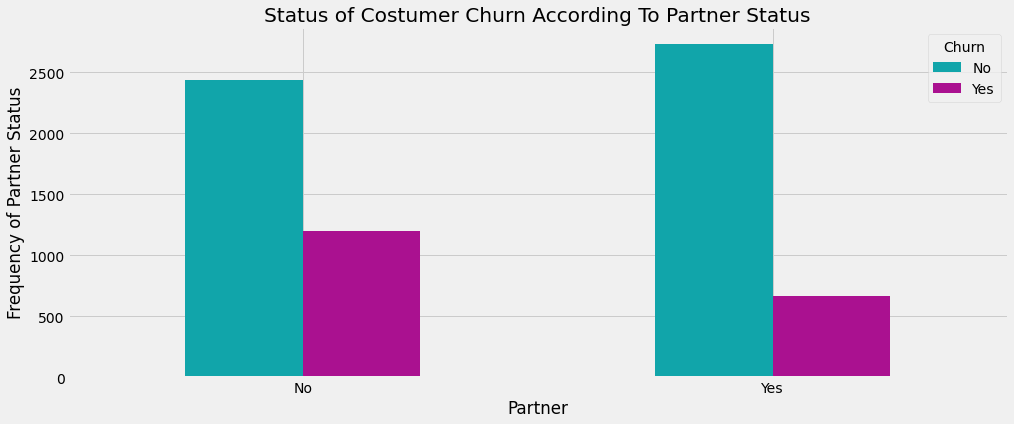

In [ ]:
pd.crosstab(df.Partner, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Partner Status')
plt.xlabel('Partner')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Partner Status')
plt.show()

#####**DEPENDENTS VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, secara umum terlihat bahwa kebanyakan pelanggan tidak memiliki tanggungan. Rasio tinggal dan pergi terlihat serupa jadi saya berasumsi tanggungan bukanlah variabel penting.

**Sehingga dapat disimpulkan bahwa fitur Dependents tidak memiliki pengaruh yang cukup kuat dalam terjadinya churn pelanggan.**

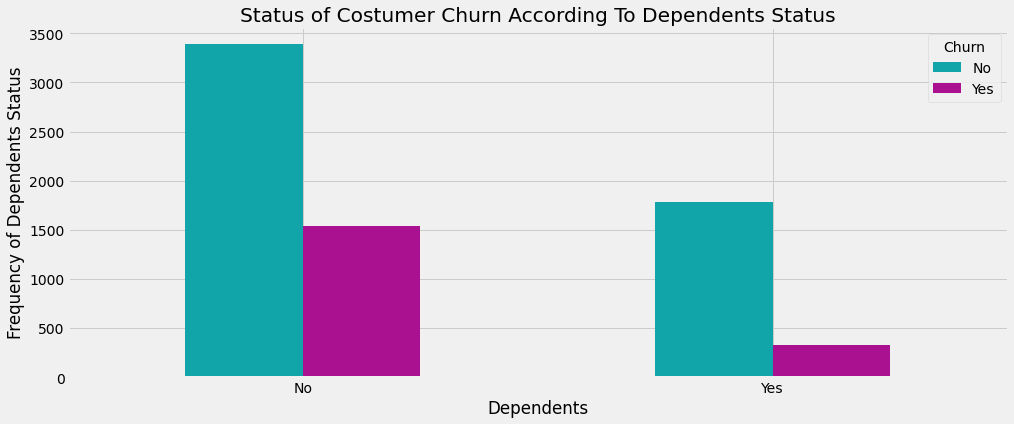

In [ ]:
pd.crosstab(df.Dependents, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Dependents Status')
plt.xlabel('Dependents')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Dependents Status')
plt.show()

#####**TENURE VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, terlihat bahwa pelanggan yang baru (nilai tenure yang kecil) cenderung lebih banyak melakukan churn dibandingkan dengan pelanggan dengan nilai tenure lebih besar.

**Sehingga dapat disimpulkan bahwa fitur Tenure memiliki pengaruh yang cukup kuat dalam terjadinya churn pelanggan.**

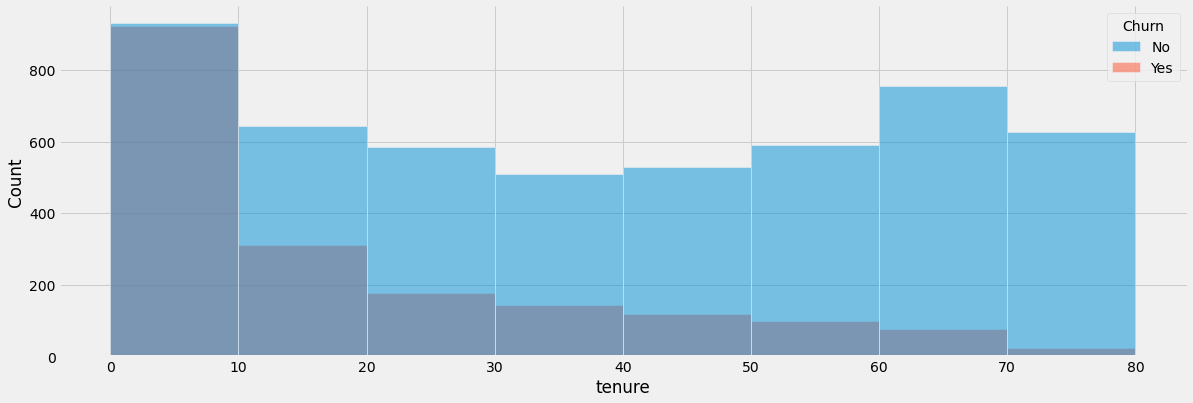

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="tenure", bins=bins, hue="Churn");
sns.despine(top=True, right=True)

#####**PHONE SERVICES VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, Meskipun sebagian besar pelanggan memiliki layanan telepon (sekitar 90%), pelanggan dengan atau tanpa layanan memiliki tingkat churn yang sama

**Sehingga dapat disimpulkan bahwa fitur Phone Services tidak memiliki pengaruh yang cukup kuat dalam terjadinya churn pelanggan.**

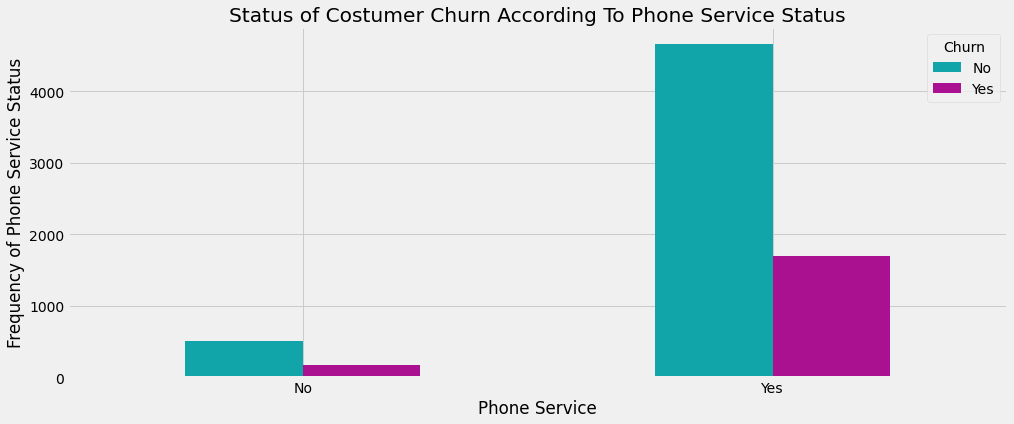

In [ ]:
pd.crosstab(df.PhoneService, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Phone Service Status')
plt.xlabel('Phone Service')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Phone Service Status')
plt.show()

#####**MULTIPLE LINES VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, terlihat bahwa pelanggan dengan layanan telepon multipleline sedikit lebih mungkin untuk churn. Namun, terlihat bahwa fitur multiple lines tidak membuat banyak perbedaan.

**Sehingga dapat disimpulkan bahwa fitur Multiple Lines tidak memiliki pengaruh yang cukup kuat dalam terjadinya churn pelanggan.**

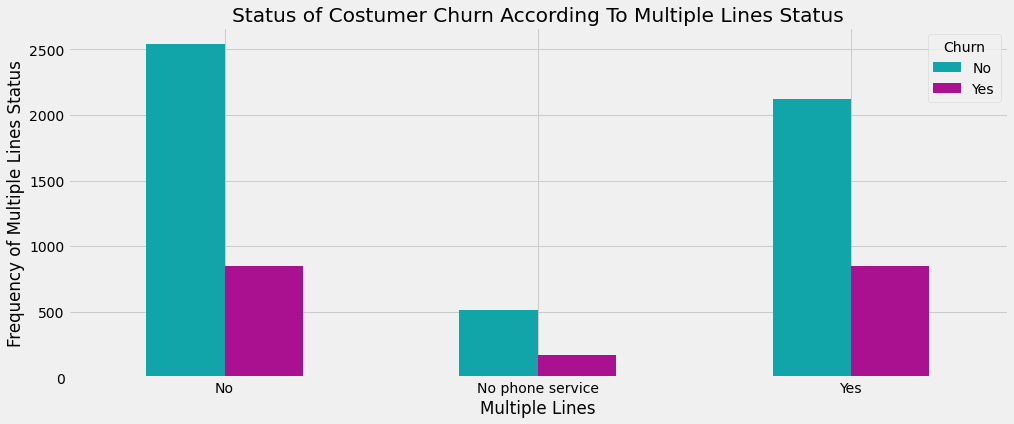

In [ ]:
pd.crosstab(df.MultipleLines, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Multiple Lines Status')
plt.xlabel('Multiple Lines')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Multiple Lines Status')
plt.show()

#####**INTERNET SERVICES VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, terlihat bahwa Pelanggan dengan serat optik cenderung lebih banyak. Mungkin ada beberapa masalah dengan layanan serat optik.

**Sehingga dapat disimpulkan bahwa fitur Internet services memiliki pengaruh yang cukup dalam terjadinya churn pelanggan.**

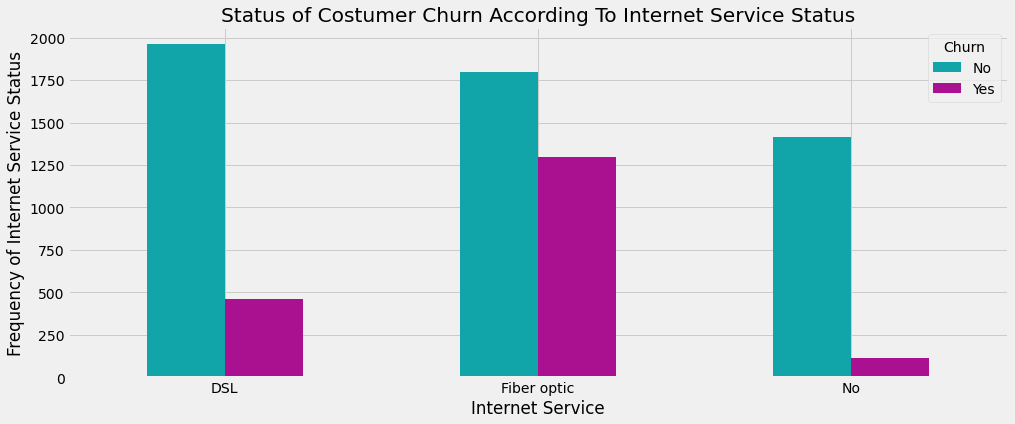

In [ ]:
pd.crosstab(df.InternetService, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Internet Service Status')
plt.xlabel('Internet Service')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Internet Service Status')
plt.show()

#####**ONLINE SECURITY VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, terlihat bahwa pelanggan yang tidak melengkapi layanan internet mereka dengan keamanan online lebih cenderung churn

**Sehingga dapat disimpulkan bahwa fitur Online Security memiliki pengaruh yang cukup dalam terjadinya churn pelanggan.**

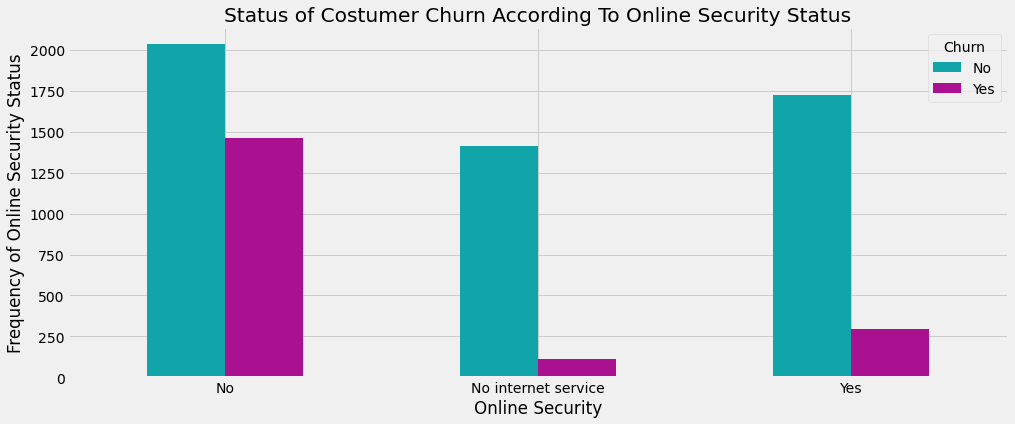

In [ ]:
pd.crosstab(df.OnlineSecurity, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Online Security Status')
plt.xlabel('Online Security')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Online Security Status')
plt.show()

#####**ONLINE BACKUP VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, terlihat bahwa pelanggan yang tidak melengkapi layanan internet mereka dengan pencadangan online lebih cenderung churn

**Sehingga dapat disimpulkan bahwa fitur Online Backup memiliki pengaruh yang cukup dalam terjadinya churn pelanggan.**

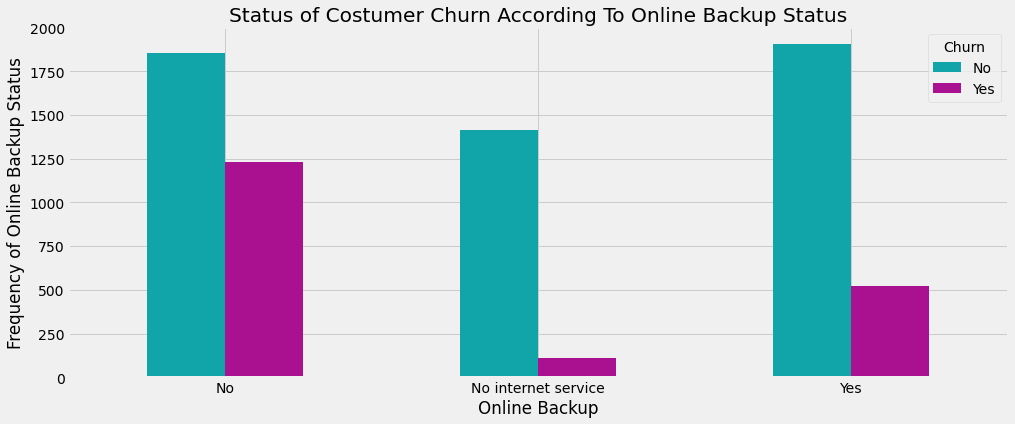

In [ ]:
pd.crosstab(df.OnlineBackup, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Online Backup Status')
plt.xlabel('Online Backup')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Online Backup Status')
plt.show()

#####**DEVICE PROTECTION VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, terlihat bahwa pelanggan yang tidak melengkapi layanan internet mereka dengan perlindungan perangkat lebih cenderung churn

**Sehingga dapat disimpulkan bahwa fitur Devive Protection memiliki pengaruh yang cukup dalam terjadinya churn pelanggan.**

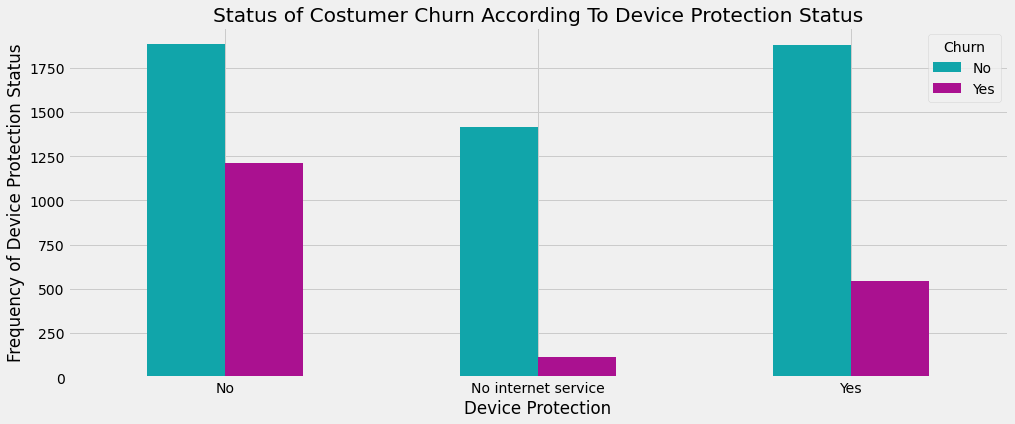

In [ ]:
pd.crosstab(df.DeviceProtection, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Device Protection Status')
plt.xlabel('Device Protection')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Device Protection Status')
plt.show()

#####**TECH SUPPORT VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, terlihat bahwa pelanggan yang tidak melengkapi layanan internet mereka dengan dukungan teknis lebih cenderung churn

**Sehingga dapat disimpulkan bahwa fitur Tech Support memiliki pengaruh yang cukup dalam terjadinya churn pelanggan.**

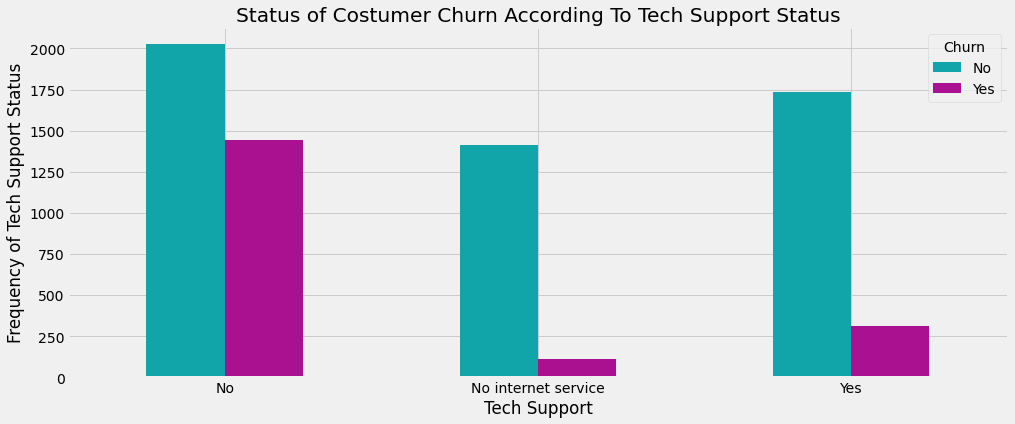

In [ ]:
pd.crosstab(df.TechSupport, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Tech Support Status')
plt.xlabel('Tech Support')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Tech Support Status')
plt.show()

#####**STREAMING TV VC CHURN**

---
StreamingTV tidak memiliki pengaruh dan berdampak besar terhadap churn

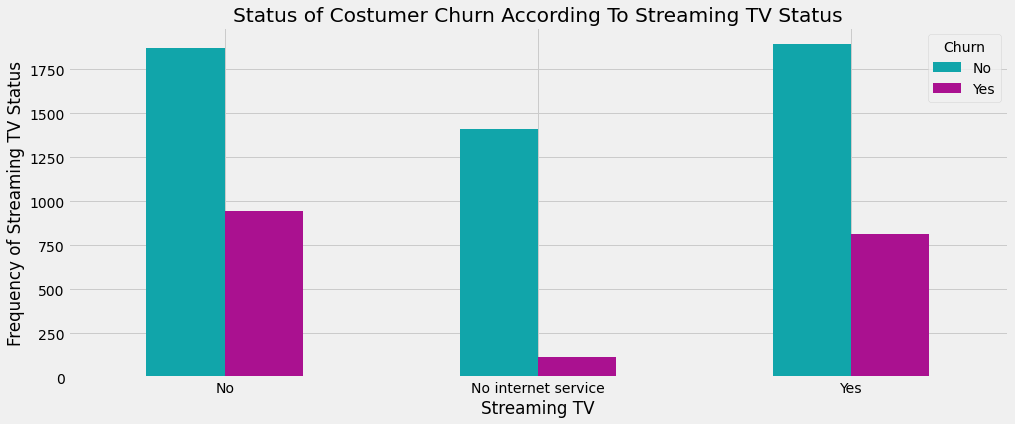

In [ ]:
pd.crosstab(df.StreamingTV, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Streaming TV Status')
plt.xlabel('Streaming TV')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Streaming TV Status')
plt.show()

#####**STREAMING MOVIES VC CHURN**

---
StreamingMovies tidak memiliki pengaruh dan berdampak besar terhadap churn

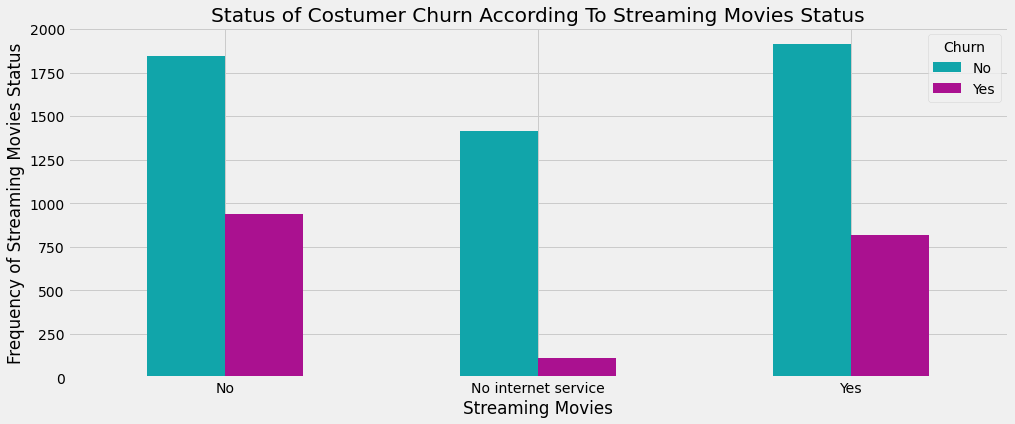

In [ ]:
pd.crosstab(df.StreamingMovies, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Streaming Movies Status')
plt.xlabel('Streaming Movies')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Streaming Movies Status')
plt.show()

#####**CONTRACT VC CHURN**

---
Dari hasil visualiasi yang ditampilkan dibawah ini, terlihat bahwa pelanggan yang memiliki status Contract month-to-month lebih cenderung churn

**Sehingga dapat disimpulkan bahwa fitur Contract memiliki pengaruh yang cukup dalam terjadinya churn pelanggan.**

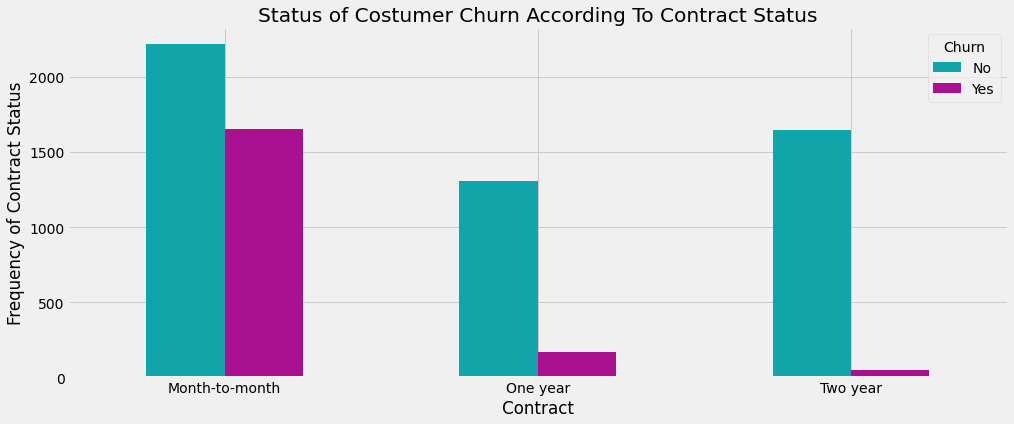

In [ ]:
pd.crosstab(df.Contract, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Contract Status')
plt.xlabel('Contract')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Contract Status')
plt.show()

#####**PAPERLESS BILLING VC CHURN**

---
Dari visualiasi dibawah ini terlihat bahwa lebih banyak customer dengan penagihan tanpa kertas melakukan churn dibandingkan dengan yang tidak.

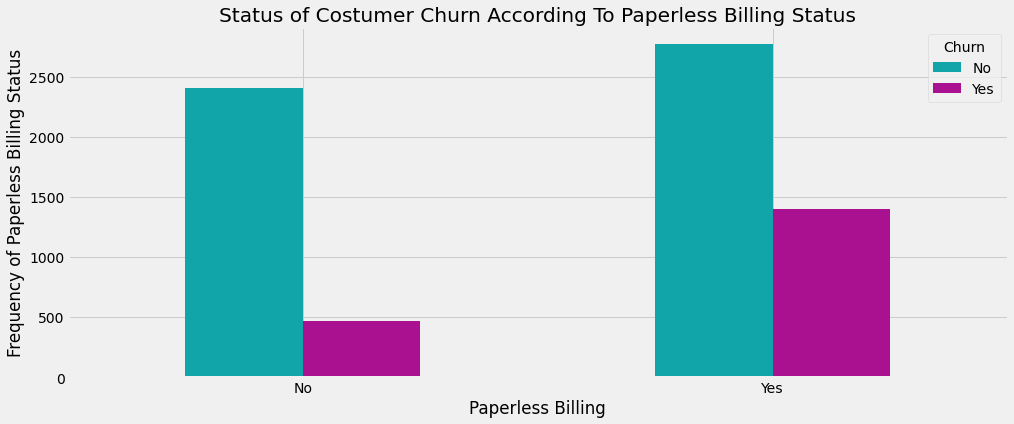

In [ ]:
pd.crosstab(df.PaperlessBilling, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Paperless Billing Status')
plt.xlabel('Paperless Billing')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Paperless Billing Status')
plt.show()

#####**PAYMENT METHOD VC CHURN**

---
Dari visualiasi dibawah ini terlihat bahwa lebih banyak customer dengan metode pembayaran **electronic check** dibandingkan dengan metode pembayaran lainnya.

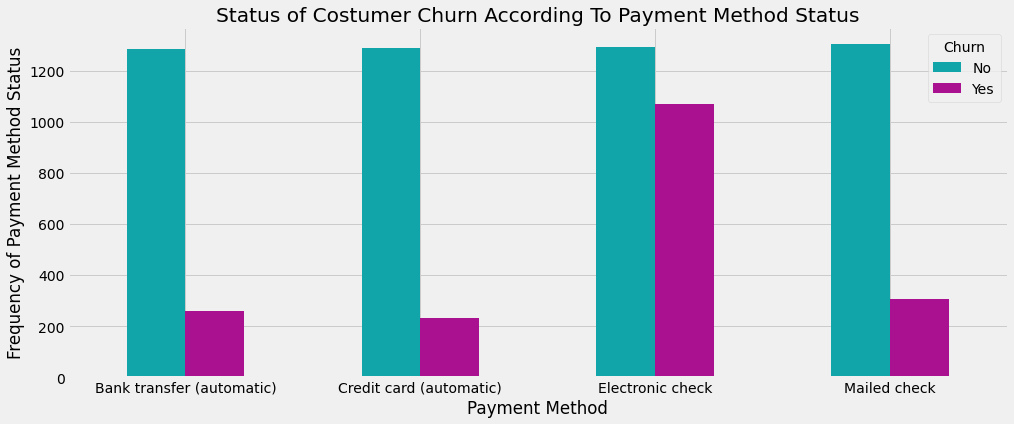

In [ ]:
pd.crosstab(df.PaymentMethod, df.Churn).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Status of Costumer Churn According To Payment Method Status')
plt.xlabel('Payment Method')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Payment Method Status')
plt.show()

#####**MONTHLY CHARGES VC CHURN**

---
Dari visualiasi dibawah ini terlihat bahwa customer dengan jumlah biaya bulanan yang bisa lebih banyak melakukan churn.

**Sehingga dapat disimpulkan fitur monthly charges memiliki pengaruh yang cukup kuat terhadap terjadinya churn**

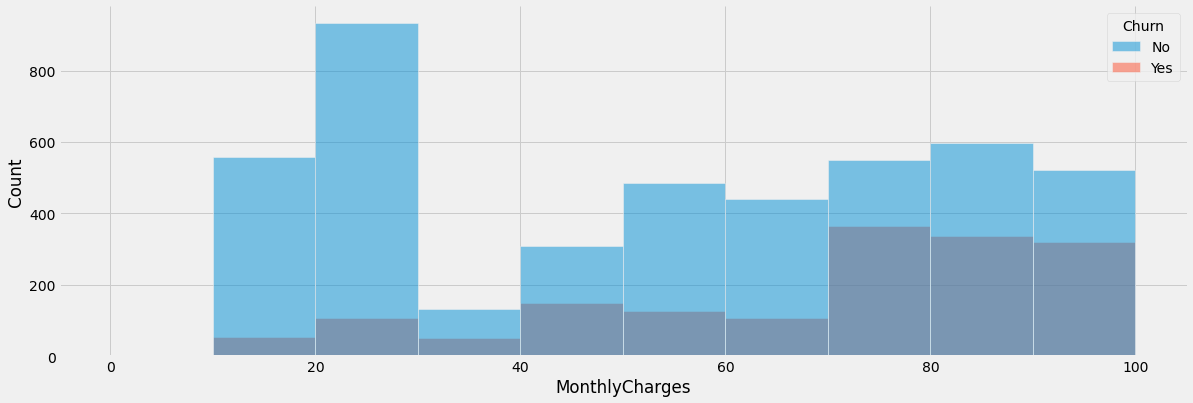

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="MonthlyCharges", bins=bins, hue="Churn");
sns.despine(top=True, right=True)

#####**TOTAL CHARGES VC CHURN**

---
Dari visualiasi dibawah ini terlihat bahwa customer dengan jumlah total biaya yang lebih sedikit, lebih banyak melakukan churn.

**Sehingga dapat disimpulkan fitur total charges memiliki pengaruh yang cukup kuat terhadap terjadinya churn**

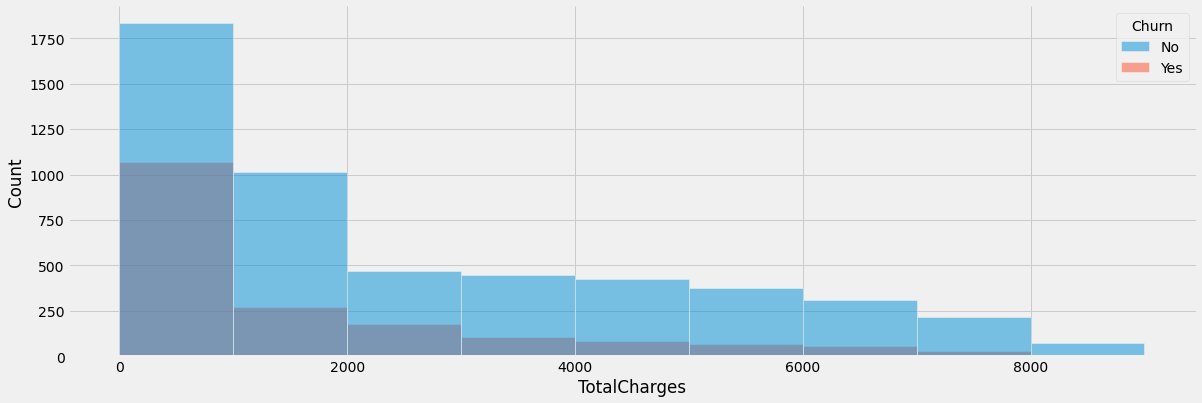

In [ ]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="TotalCharges", bins=bins, hue="Churn");
sns.despine(top=True, right=True)

###**KESIMPULAN EDA**

---

Based on EDA analisis (persebaran semua fitur terhadap fitur target), dapat disimpulkan bahwa fitur yang memiliki pengaruh terhadap terjadinya churn adalah:

1. Tenure
2. Contract
3. InternetServices
4. OnlineSecurity
5. OnliveBackup
6. DeviceProtection
7. TechSupport
8. MonthlyCharges
9. TotalCharges


#6. DATA PREPROCESSING

###6.1 SPLIT DATA

In [ ]:
X = df.drop('Churn', axis = 1)
y = df.Churn

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=28, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.05,
                                                  random_state=28, stratify = y_train)
X_train.shape, X_test.shape, X_val.shape

((5352, 19), (1409, 19), (282, 19))

###6.2 HANDLING OUTLIER

**Saya melakukan capping untuk menghandle variabel yang mengandung outlier dengan presentase outlier diatas 3% - 15%. Dan melakukan trimming untuk menghandle variabel yang mengandung outlier dengan presentase outlier dibawah 3%**

**Dan melakukan analisis pada fitur dengan outlier diatas 15%**

#####X_train

In [ ]:
'''
Menampilkan presentasi outlier pada X_train

'''
num_train = X_train._get_numeric_data() 
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column tenure outliers = 0.00%
Column MonthlyCharges outliers = 0.00%
Column TotalCharges outliers = 0.00%


Dari hasil yang ditamplikan diatas, terlihat bahwa tidak akan ada outlier yang di trimming maupun di capping. Dikarenakan X_train bersih dari outlier.

#####X_test

In [ ]:
'''
Menampilkan presentasi outlier pada X_test

'''

num_test = X_test._get_numeric_data() 
for k, v in num_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column tenure outliers = 0.00%
Column MonthlyCharges outliers = 0.00%
Column TotalCharges outliers = 0.43%


Terlihat bahwa terdapat outlier pada fitur TotalCharges sebesar 0.43% karena memiliki presentase outlier dibawah 3% saya memutuskan untuk melakukan trimming sebagai treatment handling outlier pada fitur TotalCharges.

In [ ]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# Limits for `TotalCharges`
TotalCharges_upper_limit, TotalCharges_lower_limit = find_skewed_boundaries(X_test, 'TotalCharges', 1.5)
TotalCharges_upper_limit, TotalCharges_lower_limit

print('TotalCharges_upper_limit : ', TotalCharges_upper_limit)
print('TotalCharges_lower_limit : ', TotalCharges_lower_limit)

TotalCharges_upper_limit :  8375.35
TotalCharges_lower_limit :  -4455.45


In [ ]:
index_drop_test = X_test.index[X_test['TotalCharges'] > TotalCharges_upper_limit]
index_drop_test.nunique()

6

In [ ]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(1403, 19)
(1403,)


X_test sudah berhasil dihandling outliernya.

#####X_val

In [ ]:
'''
Menampilkan presentasi outlier pada X_val

'''

num_val = X_val._get_numeric_data() 
for k, v in num_val.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_val)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column tenure outliers = 0.00%
Column MonthlyCharges outliers = 0.00%
Column TotalCharges outliers = 0.00%


Dari hasil yang ditamplikan diatas, terlihat bahwa tidak akan ada outlier yang di trimming maupun di capping. Dikarenakan X_val bersih dari outlier.

###6.3 FEATURE SELECTION

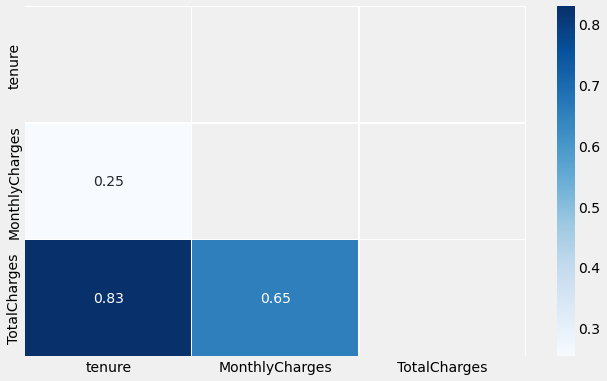

In [ ]:
# Correlation between the numerical features 
fig, ax = plt.subplots(figsize=(10,6))

mask = np.triu(np.ones_like(X_train.corr(), dtype=np.bool))
sns.heatmap(X_train.corr(), annot=True, cmap="Blues", mask=mask, linewidth=0.5, fmt=".2f")

In [ ]:
# Correlation in Categorical Features

categorical = [var for var in X_train.columns if X_train[var].dtype=='object']

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

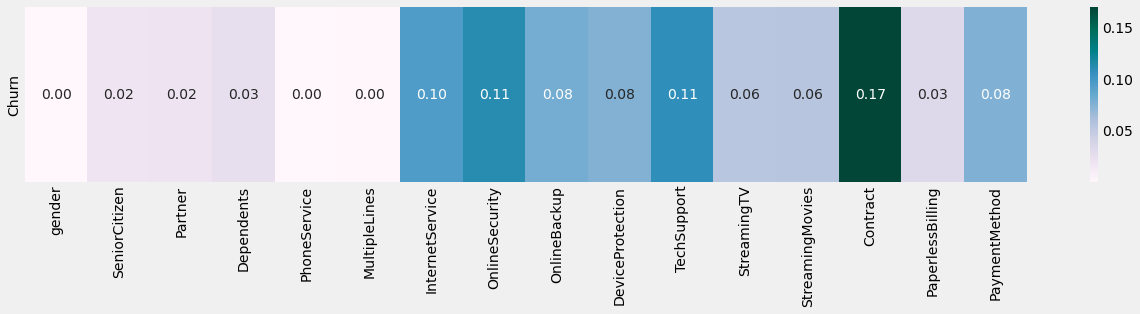

In [ ]:
theilu = pd.DataFrame(index=['Churn'],columns=df[categorical].columns)
columns = df[categorical].columns
for j in range(0,len(columns)):
    u = theil_u(df['Churn'].tolist(),df[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.rcParams['font.size'] = '14'
plt.figure(figsize=(20,3))
sns.heatmap(theilu,annot=True,fmt='.2f', cmap = 'PuBuGn')
plt.show()

In [ ]:
num_cols=X_train.select_dtypes(include=['int64','float64']).columns.tolist()

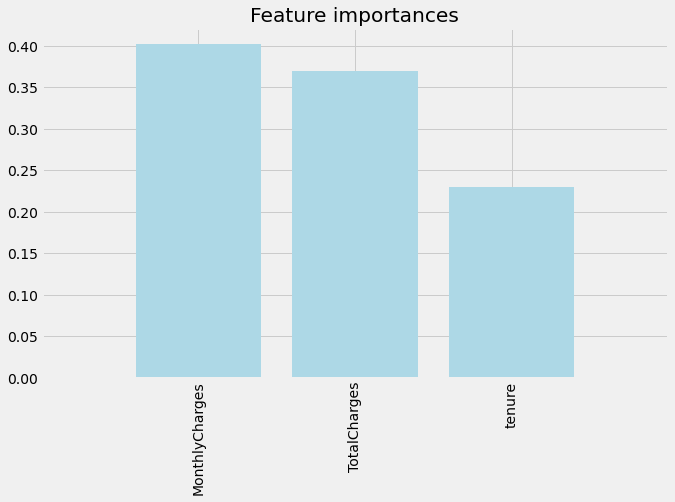

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=400)
model.fit(X_train[num_cols], y_train)

# feature_importances_ from highest to lowest
sorted_idx = np.argsort(model.feature_importances_)
sorted_idx = sorted_idx[::-1]

# plot feature importances
plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(X_train[num_cols].shape[1]), model.feature_importances_[sorted_idx],
        color="lightblue", align="center")
plt.xticks(range(X_train[num_cols].shape[1]), X_train[num_cols].columns[sorted_idx], rotation=90)
plt.xlim([-1, X_train[num_cols].shape[1]])
plt.show()

Feature gender : 0.03 
Feature SeniorCitizen : 128.07 
Feature Partner : 62.78 
Feature Dependents : 99.19 
Feature PhoneService : 0.06 
Feature MultipleLines : 15.78 
Feature InternetService : 6.04 
Feature OnlineSecurity : 482.06 
Feature OnlineBackup : 171.16 
Feature DeviceProtection : 131.39 
Feature TechSupport : 413.01 
Feature StreamingTV : 5.46 
Feature StreamingMovies : 4.66 
Feature Contract : 855.38 
Feature PaperlessBilling : 76.86 
Feature PaymentMethod : 48.77 



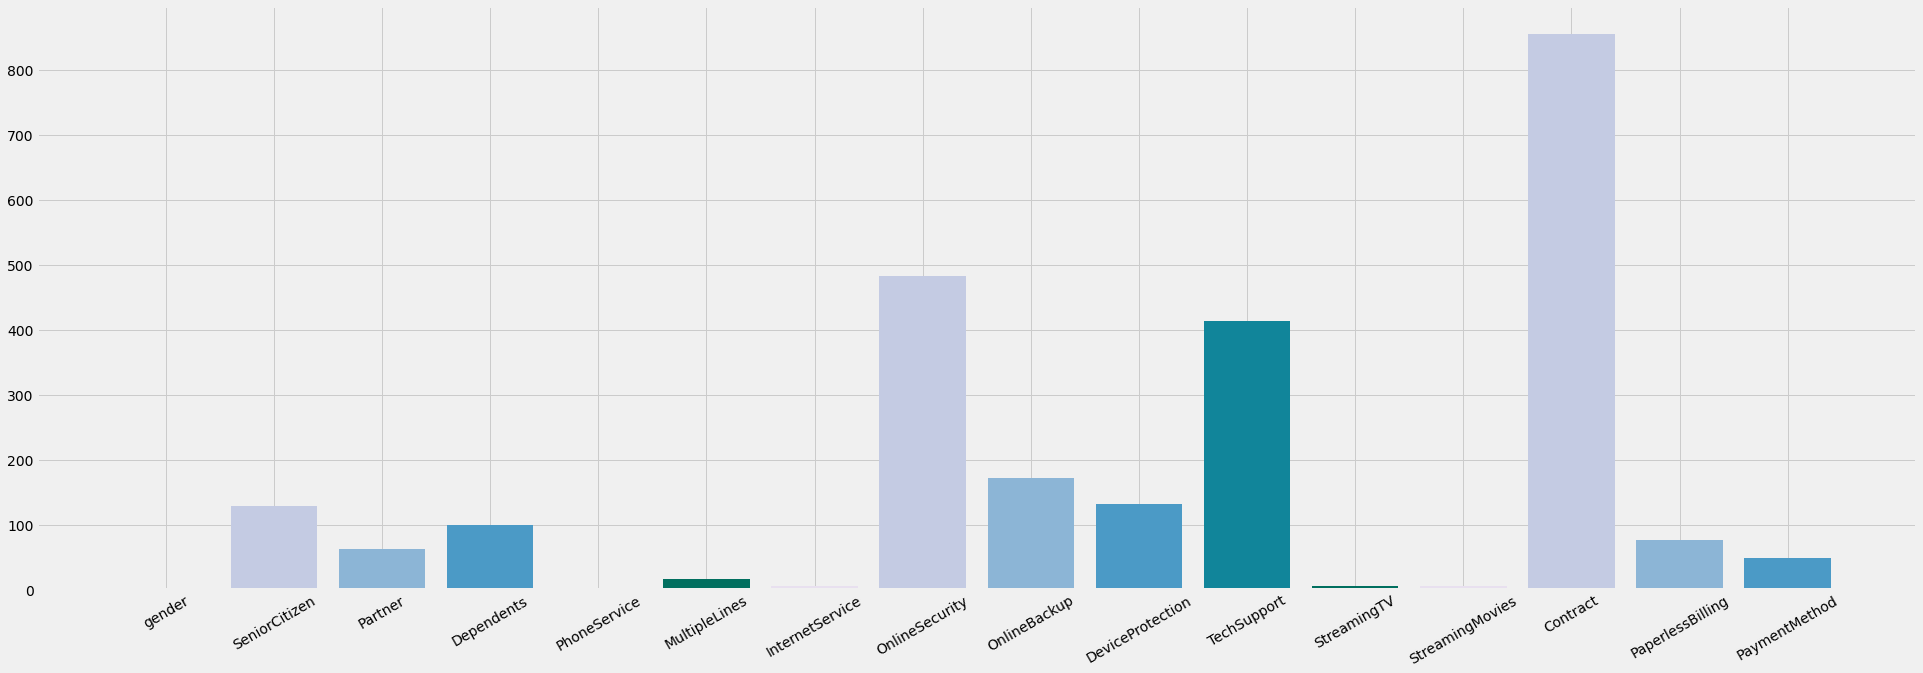

In [ ]:
#Define feature encoder 
le = LabelEncoder() #categorical encoder
feat_cat = pd.concat([X_train[categorical], y_train], axis=1) 
feat_cats= feat_cat.apply(le.fit_transform) #transform categorical to numeric

#Define Feature Selection with Chi-Square approach
fs_cat = SelectKBest(score_func=chi2, k='all')

#Apply categorical feature selection to Training Data
X_features_cat = fs_cat.fit_transform(feat_cats.drop("Churn", axis=1), feat_cats['Churn'])

# what are scores for the features
for col in list(feat_cats.drop("Churn", axis=1).columns):
  score = fs_cat.scores_[feat_cats.drop("Churn", axis=1).columns.get_loc(col)]
  print("Feature %s : %.2f " %(col , score))
print("")

#barplot
PALETTE = sns.color_palette("PuBuGn")
plt.figure(figsize=(30,10));
plt.bar([col for col in list(feat_cats.drop("Churn", axis=1).columns)], fs_cat.scores_ , color=PALETTE);
plt.xticks(rotation=30);

Dari informasi yang didapatkan dari beberapa visualisasi diatas, saya memutuskan untuk memilih semua fitur numerik karena ketiganya memiliki pengaruh yang kuat terhadap terjadinya churn dan ketiga fitur tersebut sejalan dengan hasil analisis saya pada tahapan EDA.

Dan memilih 3 fitur numerik dengan pengaruh terkuat yang bisa dilihat pada visualisasi feature selection dengan chi square yang ditampilkan diatas dan ketiga fitur tersebut sejalan dengan hasil analisis saya pada tahapan EDA.

Keenam fitur terpilih adalah:

1. MonthlyCharges
2. TotalCharges
3. tenure
4. Contract
5. OnlineSecurity
6. TechSupport

In [ ]:
X_train = X_train.loc[:, ['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract', 'OnlineSecurity', 'TechSupport']]
X_test = X_test.loc[:, ['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract', 'OnlineSecurity', 'TechSupport']]
X_val = X_val.loc[:, ['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract', 'OnlineSecurity', 'TechSupport']]

###6.4 FEATURE ENCODING

In [ ]:
#Encoding fitur target

y_train = y_train.map({'Yes' : 1, 'No' : 0})
y_test = y_test.map({'Yes' : 1, 'No' : 0})
y_val = y_val.map({'Yes' : 1, 'No' : 0})

In [ ]:
#Enconding fitur input

X_train['Contract'] = X_train['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
X_train['OnlineSecurity'] = X_train['OnlineSecurity'].map({'No': 0, 'No internet service': 1, 'Yes': 2})
X_train['TechSupport'] = X_train['TechSupport'].map({'No': 0, 'No internet service': 1, 'Yes': 2})

X_test['Contract'] = X_test['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
X_test['OnlineSecurity'] = X_test['OnlineSecurity'].map({'No': 0, 'No internet service': 1, 'Yes': 2})
X_test['TechSupport'] = X_test['TechSupport'].map({'No': 0, 'No internet service': 1, 'Yes': 2})

X_val['Contract'] = X_val['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
X_val['OnlineSecurity'] = X_val['OnlineSecurity'].map({'No': 0, 'No internet service': 1, 'Yes': 2})
X_val['TechSupport'] = X_val['TechSupport'].map({'No': 0, 'No internet service': 1, 'Yes': 2})

###6.5 PIPELINE DEFINITION FOR LAYER NORMALIZER

In [ ]:
X_train = tf.convert_to_tensor(X_train)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

###6.6 OVERSAMPLING CHURN WITH SMOTE

In [ ]:
X_train = X_train.numpy()

In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling- counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y==0)))
print("*******************************************************************")

sm = SMOTE(random_state=100)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling with SMOTE- x_train: {}'.format(X_train.shape))
print('After OverSampling with SMOTE- y_train: {} \n'.format(y_train.shape))

print("After OverSampling with SMOTE- counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling with SMOTE- counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling- counts of label '1': 0
Before OverSampling- counts of label '0': 0 

*******************************************************************
After OverSampling with SMOTE- x_train: (7864, 6)
After OverSampling with SMOTE- y_train: (7864,) 

After OverSampling with SMOTE- counts of label '1': 3932
After OverSampling with SMOTE- counts of label '0': 3932


Setelah dilakukan SMOTE proporsi fitur dan label pada X_train sudah seimbang

###6.7 PIPELINE DEFINITION FOR INPUT FITUR

In [ ]:
train = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(1000).batch(200)
val = tf.data.Dataset.from_tensor_slices((X_val,y_val)).shuffle(1000).batch(200)
test = tf.data.Dataset.from_tensor_slices((X_test,y_test)).shuffle(1000).batch(200)

#7. PEMODELAN

Label pada fitur target berjumlah 2 kelas berarti case-nya tentang binary classification, output layer akan menggunakan sigmoid dan loss function akan menggunakan binary crossentropy.

input shape sebesar 6 dikarenakan setelah melakukan feature selection, diputuskan hanya akan menggunakan 6 fitur yang memiliki strong relationship terhadap terjadinya churn

**Pada tahap pemodelan saya akan mendefinisikan basic model yang terdiri dari 1 layer input, normalizer, hidden layers, 1 layer output. Dengan fungsi aktivasi ReLu pada hidden layer, optimizer adam dan jumlah epoch sebanyak 100.**

Akan dilakukan percobaan mengenai jumlah hidden layer yang paling tepat untuk digunakan dalam kasus ini. Dimulai dengan jumlah hidden layer sebanyak 3 dan seterusnya dengan penambahan layers sebanyak 2 (3, 5, 7, dst), setelah itu akan dilakukan perbandingan jumlah hidden layer yang menghasilkan performansi model yang cukup baik.

###7.1 HIDDEN LAYER = 3

In [ ]:
model_seq_h3 = tf.keras.Sequential([
          Input(shape=(6,)),
          normalizer,                                
          Dense(10, activation='relu'),
          Dense(7, activation='relu'),                 
          Dense(3, activation='relu'),
          Dense(1, activation='sigmoid')                  
])

model_seq_h3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_seq_h3 = model_seq_h3.fit(train, epochs=100, validation_data=val)

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 0.7226 - accuracy: 0.4012 - val_loss: 0.7008 - val_accuracy: 0.6135
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.7077 - val_loss: 0.6997 - val_accuracy: 0.6028
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6274 - accuracy: 0.6966 - val_loss: 0.7132 - val_accuracy: 0.6277
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.7265 - val_loss: 0.7237 - val_accuracy: 0.6383
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7462 - val_loss: 0.7290 - val_accuracy: 0.6454
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.7533 - val_loss: 0.7282 - val_accuracy: 0.6560
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.7589 - val_loss: 0.7267 - val_accuracy: 0.6738
Epoch 8/100
4

###7.2 HIDDEN LAYER = 5

In [ ]:
model_seq_h5 = tf.keras.Sequential([
          Input(shape=(6,)),
          normalizer,
          Dense(15, activation='relu'),                                
          Dense(10, activation='relu'),
          Dense(7, activation='relu'),
          Dense(5, activation='relu'),                 
          Dense(3, activation='relu'),
          Dense(1, activation='sigmoid')                  
])

model_seq_h5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_seq_h5 = model_seq_h5.fit(train, epochs=100, validation_data=val)

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 0.6915 - accuracy: 0.6180 - val_loss: 0.6947 - val_accuracy: 0.6135
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6993 - val_loss: 0.6999 - val_accuracy: 0.6206
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.7187 - val_loss: 0.7122 - val_accuracy: 0.6135
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.7244 - val_loss: 0.7331 - val_accuracy: 0.6170
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.7304 - val_loss: 0.7484 - val_accuracy: 0.6170
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6210 - accuracy: 0.7356 - val_loss: 0.7511 - val_accuracy: 0.6277
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6169 - accuracy: 0.7340 - val_loss: 0.7470 - val_accuracy: 0.6454
Epoch 8/100
4

###7.3 HIDDEN LAYER = 7

In [ ]:
model_seq_h7 = tf.keras.Sequential([
          Input(shape=(6,)),
          normalizer,
          Dense(15, activation='relu'),
          Dense(12, activation='relu'),                                
          Dense(10, activation='relu'),
          Dense(9, activation='relu'),
          Dense(7, activation='relu'),
          Dense(5, activation='relu'),                 
          Dense(3, activation='relu'),
          Dense(1, activation='sigmoid')                  
])

model_seq_h7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_seq_h7 = model_seq_h7.fit(train, epochs=100, validation_data=val)

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 0.6993 - accuracy: 0.4996 - val_loss: 0.6600 - val_accuracy: 0.7340
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.5000 - val_loss: 0.6099 - val_accuracy: 0.7340
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.5000 - val_loss: 0.5499 - val_accuracy: 0.7340
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.7518 - val_loss: 0.5361 - val_accuracy: 0.6773
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5832 - accuracy: 0.7490 - val_loss: 0.5306 - val_accuracy: 0.6773
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.7402 - val_loss: 0.5287 - val_accuracy: 0.6560
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.7387 - val_loss: 0.5281 - val_accuracy: 0.6525
Epoch 8/100
4

######Visualisasi hidden layer (3)

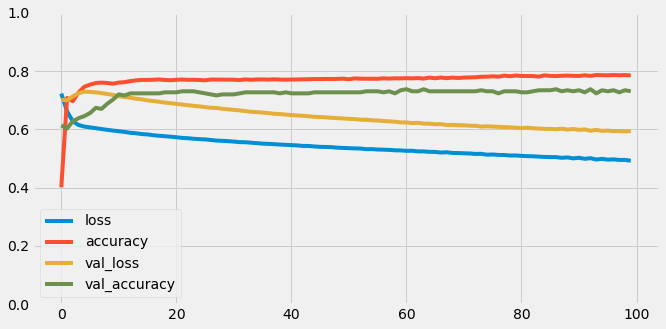

In [ ]:
pd.DataFrame(history_seq_h3.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Basic model dengan hidden layer = 3, menghasilkan model yang semakin mendekati konvergen. Bisa dilihat pada visualisasi di atas, accuracy-nya semakin mendekati 1 (meningkat) dan loss-nya semakin mendekati 0 (menurun)

######Visualisasi hidden layer (5)

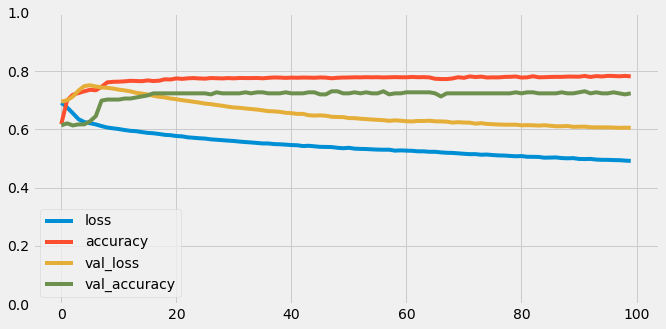

In [ ]:
pd.DataFrame(history_seq_h5.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Basic model dengan hidden layer = 5, menghasilkan model yang semakin mendekati konvergen. Bisa dilihat pada visualisasi di atas, accuracy-nya semakin mendekati 1 (meningkat) dan loss-nya semakin mendekati 0 (menurun). Dan jika dibandingkan dengan hasil hidden layer = 3, based on visualization hidden layer = 5 menghasilkan performa model yang lebih baik.

######Visualisasi hidden layer (7)

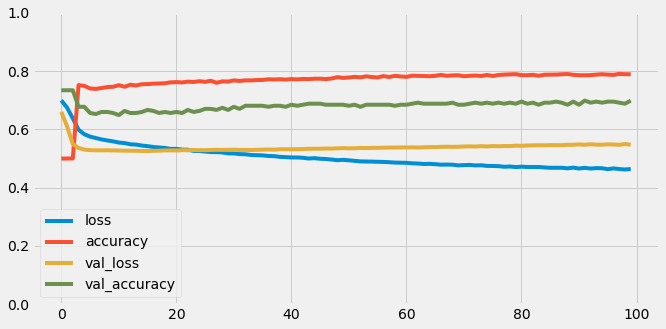

In [ ]:
pd.DataFrame(history_seq_h7.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Basic model dengan hidden layer = 7, menghasilkan model yang kurang stabil. Dan jika dibandingkan dengan hasil hidden layer = 3 dan 5, based on visualization hidden layer = 7 menghasilkan performa model yang belum cukup baik jika dibandingkan dengan kedua jumlah hidden layer sebelumnya.

Based on hasil visualisasi model dari jumlah hidden layer - 7, saya memutuskan untuk tidak melakukan percobaan penambahan hidden layer lebih dari 7.

###7.4 CHOOSE BEST PROPORTION OF HIDDEN LAYER FOR THIS CASE

Dari perbandingan visualisasi ketiga jumlah hidden layer yang berbeda, saya memilih menggunakan jumlah hidden layer = 5 untuk di-improve modelnya karena menghasilkan model yang lebih stabil dan dengan jumlah epoch 100 menghasilkan model yang lebih mendekati konvergen dibandingkan dengan hidden layer sebanyak 3 dan 7.

#8. MODEL IMPROVEMENT

Untuk menghasilkan performa model yang lebih baik, saya menambahkan dropout sebesar 0.3 di setiap hidden layer dan batch normalization di setiap hidden layer.

Saya juga akan menggunakan gradient clipping untuk handling exploding.

Saya akan set weight initializations (WI) dengan **he** karena saya menggunakan fungsi aktivasi ReLu dan variasi ReLu lainnya (elu dan LeakyRelu), sementara jika WI tidak diset maka akan menggunakan default yaitu Glorot Uniform. Glorot Uniform tidak tepat jika dipasangkan dengan fungsi aktivasi ReLu.

Pada tahapan ini juga saya akan membandingkan setiap optimizer (Adam, Nadam, Adamax dn RMSprop), juga membandingkan fungsi aktivasi (ReLu, elu, LeakyReLu) terbaik untuk model ini.

###8.1 FUNGSI AKTIVASI

#####RELU

In [ ]:
model_seq_relu = keras.models.Sequential()
model_seq_relu.add(Input(shape=(6,)))
model_seq_relu.add(normalizer)
model_seq_relu.add(Dense(15, activation='relu', kernel_initializer= 'he_normal', use_bias=False))
model_seq_relu.add(Dropout(rate=0.3))
model_seq_relu.add(BatchNormalization())
model_seq_relu.add(Dense(10, activation='relu', kernel_initializer= 'he_normal', use_bias=False))
model_seq_relu.add(Dropout(rate=0.3))
model_seq_relu.add(BatchNormalization())
model_seq_relu.add(Dense(7, activation='relu', kernel_initializer= 'he_normal', use_bias=False))
model_seq_relu.add(Dropout(rate=0.3))
model_seq_relu.add(BatchNormalization())
model_seq_relu.add(Dense(5, activation='relu', kernel_initializer= 'he_normal', use_bias=False))
model_seq_relu.add(Dropout(rate=0.3))
model_seq_relu.add(BatchNormalization())
model_seq_relu.add(Dense(3, activation='relu', kernel_initializer= 'he_normal', use_bias=False))
model_seq_relu.add(Dropout(rate=0.2))
model_seq_relu.add(BatchNormalization())
model_seq_relu.add(Dense(1, activation='sigmoid'))

Epoch 1/100
40/40 [==============================] - 2s 10ms/step - loss: 0.9294 - accuracy: 0.4968 - val_loss: 0.6665 - val_accuracy: 0.6809
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.8561 - accuracy: 0.5102 - val_loss: 0.6419 - val_accuracy: 0.6879
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.8090 - accuracy: 0.5136 - val_loss: 0.6200 - val_accuracy: 0.7340
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7815 - accuracy: 0.5301 - val_loss: 0.6094 - val_accuracy: 0.7376
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7612 - accuracy: 0.5234 - val_loss: 0.6077 - val_accuracy: 0.7376
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7583 - accuracy: 0.5168 - val_loss: 0.6084 - val_accuracy: 0.7553
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7424 - accuracy: 0.5160 - val_loss: 0.6101 - val_accuracy: 0.7553
Epoch 8/100


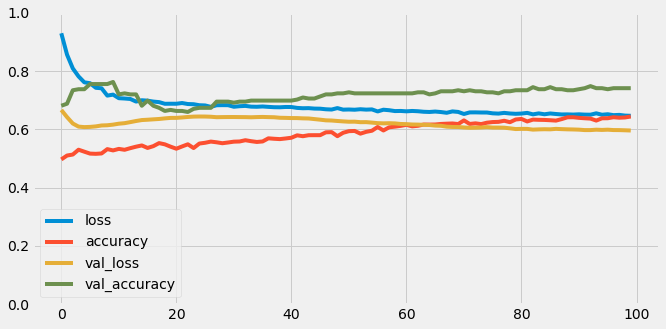

In [ ]:
model_seq_relu.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(clipvalue=1.0), metrics=['accuracy'])

history_seq_relu = model_seq_relu.fit(train, epochs=100, validation_data=val)

pd.DataFrame(history_seq_relu.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#####ELU 

In [ ]:
model_seq_elu = keras.models.Sequential()
model_seq_elu.add(Input(shape=(6,)))
model_seq_elu.add(normalizer)
model_seq_elu.add(Dense(15, activation='elu', kernel_initializer= 'he_normal', use_bias=False))
model_seq_elu.add(Dropout(rate=0.3))
model_seq_elu.add(BatchNormalization())
model_seq_elu.add(Dense(10, activation='elu', kernel_initializer= 'he_normal', use_bias=False))
model_seq_elu.add(Dropout(rate=0.3))
model_seq_elu.add(BatchNormalization())
model_seq_elu.add(Dense(7, activation='elu', kernel_initializer= 'he_normal', use_bias=False))
model_seq_elu.add(Dropout(rate=0.3))
model_seq_elu.add(BatchNormalization())
model_seq_elu.add(Dense(5, activation='elu', kernel_initializer= 'he_normal', use_bias=False))
model_seq_elu.add(Dropout(rate=0.3))
model_seq_elu.add(BatchNormalization())
model_seq_elu.add(Dense(3, activation='elu', kernel_initializer= 'he_normal', use_bias=False))
model_seq_elu.add(Dropout(rate=0.2))
model_seq_elu.add(BatchNormalization())
model_seq_elu.add(Dense(1, activation='sigmoid'))

Epoch 1/100
40/40 [==============================] - 2s 9ms/step - loss: 0.7756 - accuracy: 0.5051 - val_loss: 0.6394 - val_accuracy: 0.6844
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7355 - accuracy: 0.5418 - val_loss: 0.6087 - val_accuracy: 0.7092
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.7089 - accuracy: 0.5628 - val_loss: 0.5984 - val_accuracy: 0.7021
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.7010 - accuracy: 0.5666 - val_loss: 0.5903 - val_accuracy: 0.7128
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6988 - accuracy: 0.5694 - val_loss: 0.5870 - val_accuracy: 0.7128
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.5917 - val_loss: 0.5848 - val_accuracy: 0.7128
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.5904 - val_loss: 0.5831 - val_accuracy: 0.7092
Epoch 8/100
4

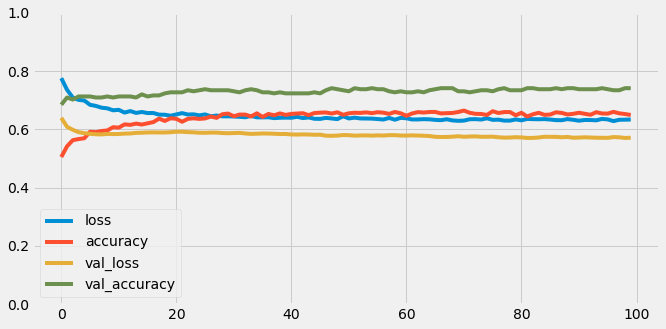

In [ ]:
model_seq_elu.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(clipvalue=1.0), metrics=['accuracy'])

history_seq_elu = model_seq_elu.fit(train, epochs=100, validation_data=val)

pd.DataFrame(history_seq_elu.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#####LEAKY RELU

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model_seq_leakyrelu = keras.models.Sequential()
model_seq_leakyrelu.add(Input(shape=(6,)))
model_seq_leakyrelu.add(normalizer)
model_seq_leakyrelu.add(Dense(15, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(10, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(7, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(5, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(3, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.2))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(1, activation='sigmoid'))

Epoch 1/100
40/40 [==============================] - 2s 10ms/step - loss: 0.8104 - accuracy: 0.4863 - val_loss: 0.7626 - val_accuracy: 0.4574
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7603 - accuracy: 0.5131 - val_loss: 0.6393 - val_accuracy: 0.6738
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7407 - accuracy: 0.5306 - val_loss: 0.6101 - val_accuracy: 0.6702
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.7236 - accuracy: 0.5455 - val_loss: 0.5961 - val_accuracy: 0.6844
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7058 - accuracy: 0.5612 - val_loss: 0.5866 - val_accuracy: 0.6879
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6980 - accuracy: 0.5585 - val_loss: 0.5833 - val_accuracy: 0.7092
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5677 - val_loss: 0.5821 - val_accuracy: 0.6986
Epoch 8/100


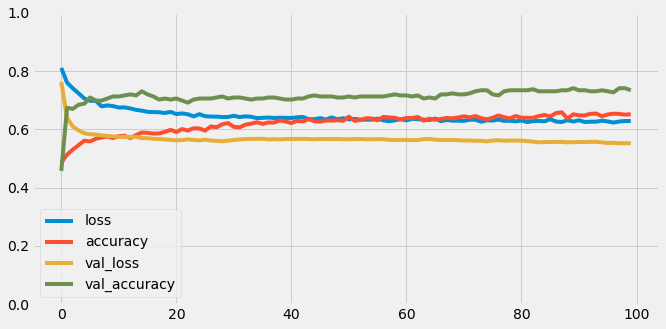

In [ ]:
model_seq_leakyrelu.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(clipvalue=1.0), metrics=['accuracy'])

history_seq_leakyrelu = model_seq_leakyrelu.fit(train, epochs=100, validation_data=val)

pd.DataFrame(history_seq_leakyrelu.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Dari hasil visualisasi train model, dibandingkan ketiga fungsi aktivasi dan fungsi aktivasi LeakyReLu menghasilkan model dengan performansi yang lebih baik dan sangat mendekati konvergen dan memiliki performa model yang lebih stabil dibandingkan ReLu dan elu.

###8.2 OPTIMIZERS

#####NADAM

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model_seq_leakyrelu = keras.models.Sequential()
model_seq_leakyrelu.add(Input(shape=(6,)))
model_seq_leakyrelu.add(normalizer)
model_seq_leakyrelu.add(Dense(15, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(10, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(7, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(5, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(3, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.2))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(1, activation='sigmoid'))

Epoch 1/100
40/40 [==============================] - 3s 10ms/step - loss: 0.7892 - accuracy: 0.4907 - val_loss: 0.8182 - val_accuracy: 0.4752
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7260 - accuracy: 0.5320 - val_loss: 0.6916 - val_accuracy: 0.6560
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7168 - accuracy: 0.5367 - val_loss: 0.6511 - val_accuracy: 0.6915
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7018 - accuracy: 0.5563 - val_loss: 0.6412 - val_accuracy: 0.7092
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5604 - val_loss: 0.6348 - val_accuracy: 0.7270
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.5680 - val_loss: 0.6307 - val_accuracy: 0.7234
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6814 - accuracy: 0.5818 - val_loss: 0.6267 - val_accuracy: 0.7199
Epoch 8/100


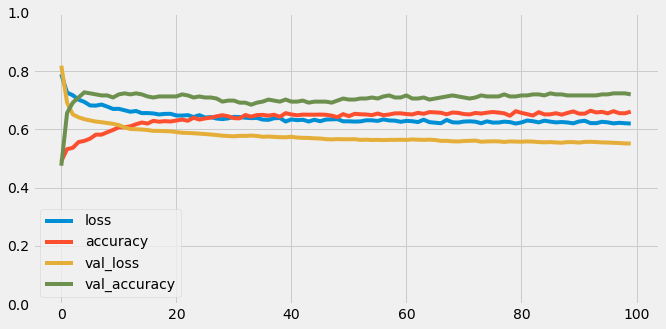

In [ ]:
model_seq_leakyrelu.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Nadam(clipvalue=1.0), metrics=['accuracy'])

history_seq_leakyrelu = model_seq_leakyrelu.fit(train, epochs=100, validation_data=val)

pd.DataFrame(history_seq_leakyrelu.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#####ADAMAX

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model_seq_leakyrelu = keras.models.Sequential()
model_seq_leakyrelu.add(Input(shape=(6,)))
model_seq_leakyrelu.add(normalizer)
model_seq_leakyrelu.add(Dense(15, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(10, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(7, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(5, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(3, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.2))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(1, activation='sigmoid'))

Epoch 1/100
40/40 [==============================] - 2s 9ms/step - loss: 0.9301 - accuracy: 0.5089 - val_loss: 0.7998 - val_accuracy: 0.4716
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.8538 - accuracy: 0.5378 - val_loss: 0.6630 - val_accuracy: 0.5532
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.8196 - accuracy: 0.5402 - val_loss: 0.6157 - val_accuracy: 0.6064
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7940 - accuracy: 0.5387 - val_loss: 0.5996 - val_accuracy: 0.6383
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.7697 - accuracy: 0.5407 - val_loss: 0.5897 - val_accuracy: 0.6738
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7569 - accuracy: 0.5437 - val_loss: 0.5873 - val_accuracy: 0.6738
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7391 - accuracy: 0.5506 - val_loss: 0.5868 - val_accuracy: 0.6702
Epoch 8/100
4

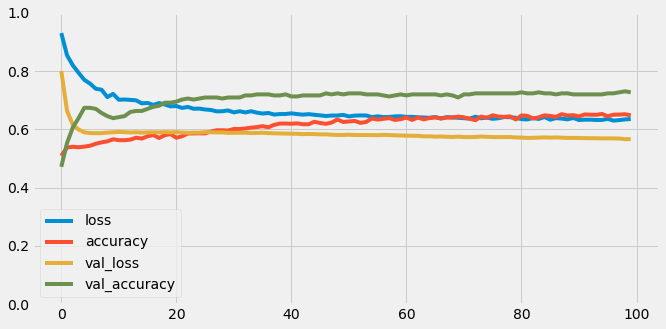

In [ ]:
model_seq_leakyrelu.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adamax(clipvalue=1.0), metrics=['accuracy'])

history_seq_leakyrelu = model_seq_leakyrelu.fit(train, epochs=100, validation_data=val)

pd.DataFrame(history_seq_leakyrelu.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#####RMSProp

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model_seq_leakyrelu = keras.models.Sequential()
model_seq_leakyrelu.add(Input(shape=(6,)))
model_seq_leakyrelu.add(normalizer)
model_seq_leakyrelu.add(Dense(15, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(10, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(7, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(5, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.3))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(3, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
model_seq_leakyrelu.add(Dropout(rate=0.2))
model_seq_leakyrelu.add(BatchNormalization())
model_seq_leakyrelu.add(Dense(1, activation='sigmoid'))

Epoch 1/100
40/40 [==============================] - 3s 10ms/step - loss: 0.7102 - accuracy: 0.5125 - val_loss: 0.6819 - val_accuracy: 0.5851
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5443 - val_loss: 0.6680 - val_accuracy: 0.6277
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5669 - val_loss: 0.6557 - val_accuracy: 0.6773
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.5776 - val_loss: 0.6395 - val_accuracy: 0.7092
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6719 - accuracy: 0.5783 - val_loss: 0.6274 - val_accuracy: 0.7163
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6624 - accuracy: 0.5954 - val_loss: 0.6166 - val_accuracy: 0.7199
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6614 - accuracy: 0.6013 - val_loss: 0.6091 - val_accuracy: 0.7270
Epoch 8/100


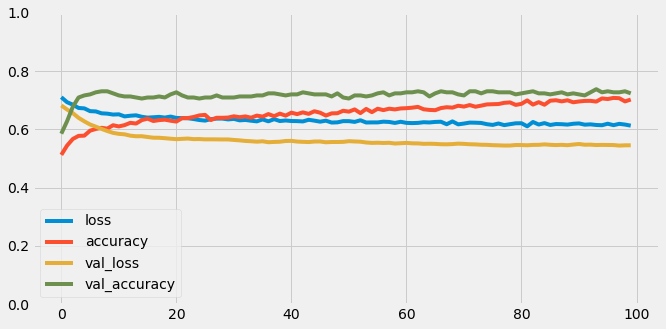

In [ ]:
model_seq_leakyrelu.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(clipvalue=1.0), metrics=['accuracy'])

history_seq_leakyrelu = model_seq_leakyrelu.fit(train, epochs=100, validation_data=val)

pd.DataFrame(history_seq_leakyrelu.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

###**BEST MODEL**

Pada tahapan ini best model akan didefiniskan modelnya dengan Sequential dan Functional API

Based on experiment, best set:
1. Fungsi aktivasi terbaik untuk model yang telah dibangun adalah Leaky ReLu
2. Optimizer terbaik adalah RMSprop

Best model terdiri dari 7 layer, 1 input layer, 5 hidden layer (dengan jumlah neuron 15, 10, 7, 5, 3) dan 1 ouput layer (fungsi aktivasi sigmoid). Terdapat normalizer, dropout disetiap layer sebesar 0.3, weight initialization = he, batch normalization serta menggunakan gradient clipping.

###BEST MODEL FUNCTIONAL

In [ ]:
input_data = Input(shape=(6,))
hidden1 = normalizer(input_data)
hidden2 = Dense(15, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False)(hidden1)
hidden3 = BatchNormalization()(hidden2)
hidden4 = Dense(10, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False)(hidden3)
hidden5 = BatchNormalization()(hidden4)
hidden6 = Dense(7, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False)(hidden5)
hidden7 = BatchNormalization()(hidden6)
hidden8 = Dense(5, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False)(hidden7)
hidden9 = BatchNormalization()(hidden8)
hidden10 = Dense(3, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False)(hidden9)
hidden11 = BatchNormalization()(hidden10)
hidden12 = Dropout(rate=0.3)(hidden11)
output = Dense(1, activation='sigmoid')(hidden12)
best_model_func = Model(inputs=input_data, outputs=output)

In [ ]:
best_model_func.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(clipvalue=1.0), metrics=['accuracy'])

history_func = best_model_func.fit(train, epochs=100, validation_data=val)

Epoch 1/100
40/40 [==============================] - 3s 9ms/step - loss: 0.7794 - accuracy: 0.6020 - val_loss: 0.8235 - val_accuracy: 0.4397
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6686 - accuracy: 0.6389 - val_loss: 0.7013 - val_accuracy: 0.5887
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6578 - accuracy: 0.6448 - val_loss: 0.6332 - val_accuracy: 0.6667
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.6431 - val_loss: 0.6011 - val_accuracy: 0.7163
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6390 - accuracy: 0.6447 - val_loss: 0.5730 - val_accuracy: 0.7234
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6341 - accuracy: 0.6509 - val_loss: 0.5631 - val_accuracy: 0.7270
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6545 - val_loss: 0.5603 - val_accuracy: 0.7128
Epoch 8/100
4

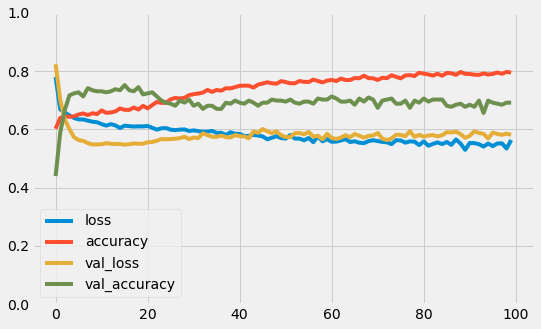

In [ ]:
pd.DataFrame(history_func.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

###BEST MODEL SEQUENTIAL

In [ ]:
best_model = keras.models.Sequential()
best_model.add(Input(shape=(6,)))
best_model.add(normalizer)
best_model.add(Dense(15, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
best_model.add(Dropout(rate=0.3))
best_model.add(BatchNormalization())
best_model.add(Dense(10, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
best_model.add(Dropout(rate=0.3))
best_model.add(BatchNormalization())
best_model.add(Dense(7, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
best_model.add(Dropout(rate=0.3))
best_model.add(BatchNormalization())
best_model.add(Dense(5, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
best_model.add(Dropout(rate=0.3))
best_model.add(BatchNormalization())
best_model.add(Dense(3, activation='LeakyReLU', kernel_initializer= 'he_normal', use_bias=False))
best_model.add(Dropout(rate=0.2))
best_model.add(BatchNormalization())
best_model.add(Dense(1, activation='sigmoid'))

Epoch 1/100
40/40 [==============================] - 3s 10ms/step - loss: 0.7869 - accuracy: 0.5348 - val_loss: 0.5309 - val_accuracy: 0.6915
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.7217 - accuracy: 0.5753 - val_loss: 0.5648 - val_accuracy: 0.6206
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6946 - accuracy: 0.5851 - val_loss: 0.5744 - val_accuracy: 0.6099
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5819 - val_loss: 0.5754 - val_accuracy: 0.6099
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6697 - accuracy: 0.5956 - val_loss: 0.5736 - val_accuracy: 0.6135
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.6114 - val_loss: 0.5708 - val_accuracy: 0.6099
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6545 - accuracy: 0.6108 - val_loss: 0.5701 - val_accuracy: 0.6135
Epoch 8/100


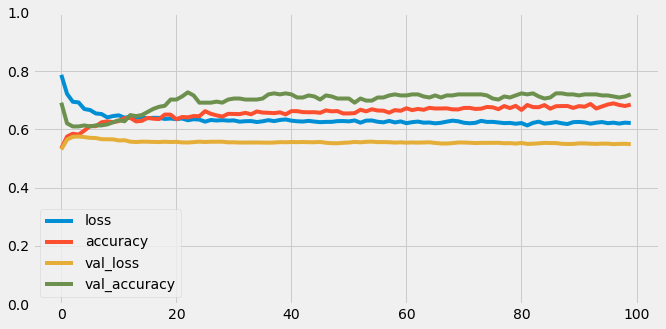

In [ ]:
best_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(clipvalue=1.0), metrics=['accuracy'])

history_best_model = best_model.fit(train, epochs=100, validation_data=val)

pd.DataFrame(history_best_model.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#9. MODEL EVALUASI

Setelah mendapatkan best model, kemudian dilakukan evaluasi terhadap data test yang sudah disediakan di tahap preprocessing

In [ ]:
best_model.evaluate(test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7227


[0.5359948873519897, 0.7227370142936707]

Hasil dari akurasi menunjukkan model mampu memprediksi sebesar 0.7227 dari dataset yang disediakan, yang mana merupakan pencapaian yang cukup baik.

In [ ]:
y_p = best_model.predict(X_test)
y_pred = []
for i in y_p:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1029
           1       0.49      0.78      0.60       374

    accuracy                           0.72      1403
   macro avg       0.69      0.74      0.69      1403
weighted avg       0.79      0.72      0.74      1403



Pada kasus untuk meminimalisir terjadinya churn, menurut saya FP lebih baik dibandingkan FN. Lebih baik model memprediksi customer positif churn namun sebenarnya tidak, dibandingkan algoritma salah memprediksi customer tidak churn padahal sebenarnya churn. Sehingga nilai recall sangat diperhatikan dalam kasus ini. Terlihat nilai recall pada hasil prediksi model menunjukkan nilai yang cukup baik.

Disamping itu terjadinya kesenjangan nilai antara label 0 dan 1 berdasarkan analisa saya dipengaruhi oleh real data yang imbalanced. Sehingga walaupun sudah dihandling dengan SMOTE namun imbalanced real data masih memiliki pengaruh yang cukup besar.

Text(24.58, 0.5, 'Truth')

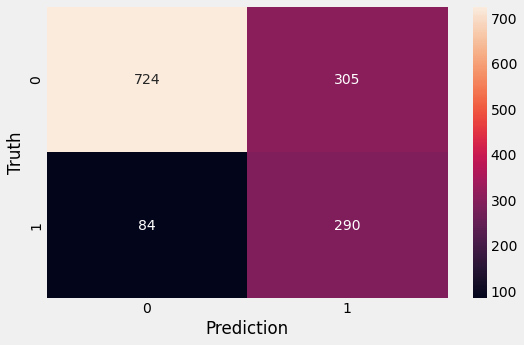

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Dari hasil confusion matrix terlihat bahwa:
1. Pada kelas 0, model berhasil memprediksi benar sebesar 721 data test dan memprediksi salah 308 data test
2. Pada kelas 1 model berhasil memprediksi benar sebesar 293 data test dan memprediksi salah 81 data test

Dari hasil tersebut dapat disimpulkan bahwa model yang telah dibangun memiliki kemampuan/performansi yang cukup baik karena model lebih banyak melakukan kebenaran prediksi dibandingkan dengan kesalahan yang dilakukan.

### SAVE MODEL

Best model yang sudah dibangun akan disimpan dengan eksistensi .h5 dan akan digunakan untuk keperluan deploy.

In [ ]:
best_model.save('best_model_ann.h5')

###LOAD MODEL

Meload best model dan akan digunakan untuk memprediksi data baru pada bagian model inference

In [ ]:
ann_model = tf.keras.models.load_model('best_model_ann.h5')
ann_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense_60 (Dense)            (None, 15)                90        
                                                                 
 dropout_31 (Dropout)        (None, 15)                0         
                                                                 
 batch_normalization_35 (Bat  (None, 15)               60        
 chNormalization)                                                
                                                                 
 dense_61 (Dense)            (None, 10)                150       
                                                                 
 dropout_32 (Dropout)        (None, 10)               

#10. MODEL INFERENCE

Melakukan predict pada data baru dengan model terbaik yang dibangun.

Step:
1. Mendefinisikan data baru
2. Preprocessing (Convert to tensor & numpy)
3. Mendefiniskan threshold
4. Predict


In [ ]:
new_data = {'MonthlyCharges' : 289, 'TotalCharges':2928, 'tenure':29, 'Contract': 2,
       'OnlineSecurity': 0, 'TechSupport': 1}

pred = pd.DataFrame(new_data, index = ['NewCustomer'])
pred

,MonthlyCharges,TotalCharges,tenure,Contract,OnlineSecurity,TechSupport
NewCustomer,289,2928,29,2,0,1


In [ ]:
pred = tf.convert_to_tensor(pred)

In [ ]:
thres = 0.5

In [ ]:
pred = pred.numpy()

In [ ]:
res = ann_model.predict(pred)

In [ ]:
if int(res > thres) :
    print('This new customer is going to do churn')
else :
    print('This new customer is not going to do churn')

This new customer is not going to do churn


#11. KESIMPULAN

###**EDA ANALISIS**

---

Based on EDA analisis (persebaran semua fitur terhadap fitur target), dapat disimpulkan bahwa fitur yang memiliki pengaruh terhadap terjadinya churn adalah:

1. Tenure
2. Contract
3. InternetServices
4. OnlineSecurity
5. OnliveBackup
6. DeviceProtection
7. TechSupport
8. MonthlyCharges
9. TotalCharges

###**MODEL ANALISIS**

---

Step yang saya lakukan untuk menghasilkan model terbaik (best model):

1. Mencari jumlah hidden layer yang tepat untuk kasus churn dengan data tabular
2. Mencari fungsi aktivasi terbaik untuk model yang sudah dibangun
3. Mencari optimizers terbaik untuk model yang sudah dibangun

---
Spesifikasi best model:

1. Terdiri dari 7 layer, 1 layer input, 5 hidden layer dan 1 layer output
2. Weight initialization adalah **he**
3. Drop out sebesar 0.3
4. Menggunakan batch normalization
5. Menggunakan gradient clipping
6. Menggunakan fungsi aktivasi terbaik, LeakyRelu
7. Menggunakan optimizer terbaik, RMSprop

---

Evaluasi model:

Pada kasus untuk meminimalisir terjadinya churn, menurut saya FP lebih baik dibandingkan FN. Lebih baik model memprediksi customer positif churn namun sebenarnya tidak, dibandingkan algoritma salah memprediksi customer tidak churn padahal sebenarnya churn. Sehingga nilai recall sangat diperhatikan dalam kasus ini. Terlihat nilai recall pada hasil prediksi model menunjukkan nilai yang cukup baik.

Disamping itu terjadinya kesenjangan nilai antara label 0 dan 1 berdasarkan analisa saya dipengaruhi oleh real data yang imbalanced. Sehingga walaupun sudah dihandling dengan SMOTE namun imbalanced real data masih memiliki pengaruh yang cukup besar.

#12. FUTURE WORK

---

Sejujurnya jika diberi waktu lebih saya ingin mencoba mengaplikasikan encoding dengan menggunakan tensor karena saya sadar di model yang saya bangun kelemahannya di part inference saat proses input data baru pada fitur kategorik. Hanya bisa menginput data pada fitur kategorik dengan nilai yang sudah di encode, yang mana saya harus give extra saat deploy untuk memberikan keterangan pada setiap nilai yang dikandung dalam angka tersebut.